In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
if os.getcwd()[-11:] != 'keras-yolo3':
    %cd keras-yolo3

from train import get_classes, get_anchors, data_generator_wrapper
from yolo import YOLO
from PIL import Image

/home/data/andy/kaggle_facemask/keras-yolo3


Using TensorFlow backend.


In [2]:
annotation_path = 'val.txt' # 轉換好格式的標註檔案
log_dir = 'logs/000/' # 訓練好的模型儲存的路徑
classes_path = 'model_data/mask_classes.txt'
anchors_path = 'model_data/yolo_anchors.txt'
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)

yolo_model = YOLO(model_path=log_dir + 'trained_weights_final.h5', classes_path=classes_path)

logs/000/trained_weights_final.h5 model, anchors, and classes loaded.


In [3]:
with open(annotation_path) as f:
    lines = f.readlines()

In [4]:
valpath = []
labels = []
for i in range(len(lines)):
    valpath.append(lines[i].split(" ")[0])
    labels.append(lines[i].split(" ")[1:])
    labels[i][-1] = labels[i][-1].replace("\n", "")

/data/NFS/andy/yolo/kaggle_facemask/images/maksssksksss795.png
(416, 416, 3)
Found 22 boxes for img
mask_weared_incorrect 0.61 (46, 198) (69, 223)
without_mask 0.58 (13, 134) (43, 154)
without_mask 0.80 (10, 3) (31, 23)
with_mask 0.36 (25, 220) (54, 251)
with_mask 0.56 (186, 28) (207, 49)
with_mask 0.71 (131, 262) (165, 294)
with_mask 0.71 (92, 133) (112, 163)
with_mask 0.80 (0, 246) (14, 280)
with_mask 0.88 (196, 210) (223, 238)
with_mask 0.88 (192, 115) (213, 141)
with_mask 0.92 (87, 66) (109, 90)
with_mask 0.92 (7, 92) (30, 117)
with_mask 0.92 (103, 7) (125, 35)
with_mask 0.93 (183, 68) (209, 89)
with_mask 0.94 (218, 231) (245, 261)
with_mask 0.94 (299, 62) (324, 93)
with_mask 0.94 (359, 90) (387, 114)
with_mask 0.95 (331, 14) (352, 35)
with_mask 0.96 (332, 48) (354, 69)
with_mask 0.96 (376, 179) (400, 206)
with_mask 0.96 (260, 66) (284, 92)
with_mask 0.97 (255, 133) (273, 158)
0.163800410926342


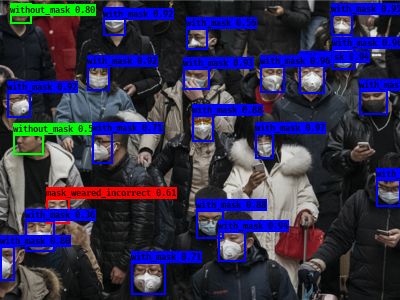

In [35]:
i = 8
print(valpath[i])
image = Image.open(valpath[i])
r_image, predictions = yolo_model.detect_image(image)
r_image